In [1]:
# Basic libraries
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Linear Regression Model
from sklearn.linear_model import LinearRegression

# Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [5]:
# import data
df = pd.read_csv(r"C:\Users\PMLS\OneDrive\Desktop\Price Prediction Project\Entities.csv")

In [6]:
df.head(5)

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


In [7]:
# check the shape
df.shape

(168446, 18)

In [8]:
df.columns

Index(['Unnamed: 0', 'property_id', 'location_id', 'page_url', 'property_type',
       'price', 'location', 'city', 'province_name', 'latitude', 'longitude',
       'baths', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Total_Area'],
      dtype='object')

In [9]:
df0 = df.rename(columns = {'Total_Area' : 'total_area'})
df0.columns

Index(['Unnamed: 0', 'property_id', 'location_id', 'page_url', 'property_type',
       'price', 'location', 'city', 'province_name', 'latitude', 'longitude',
       'baths', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'total_area'],
      dtype='object')

In [10]:
# check for missing values and data types
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     168446 non-null  int64  
 1   property_id    168446 non-null  int64  
 2   location_id    168446 non-null  int64  
 3   page_url       168446 non-null  object 
 4   property_type  168446 non-null  object 
 5   price          168446 non-null  int64  
 6   location       168446 non-null  object 
 7   city           168446 non-null  object 
 8   province_name  168446 non-null  object 
 9   latitude       168446 non-null  float64
 10  longitude      168446 non-null  float64
 11  baths          168446 non-null  int64  
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  total_area     168446 non-nul

In [11]:
# check the summary statistics
df0.describe()

,Unnamed: 0,property_id,location_id,price,latitude,longitude,baths,bedrooms,total_area
count,168446.000000,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,1.684460e+05
mean,84222.500000,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,1.394239e+04
std,48626.316059,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,8.623647e+05
min,0.000000,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000e+00
25%,42111.250000,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,1.905757e+03
50%,84222.500000,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,4.356016e+03
75%,126333.750000,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,1.197904e+04
max,168445.000000,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,3.387988e+08


In [12]:
# check for missing values
df0.isnull().sum()

Unnamed: 0           0
property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
total_area           0
dtype: int64

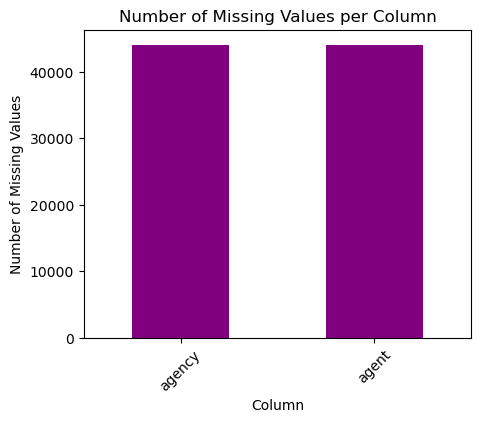

In [13]:
# Plot missing values count per column
plt.figure(figsize=(5, 4))
missing_counts = df0.isnull().sum()

# Only include columns with missing values
missing_counts = missing_counts[missing_counts > 0]  
missing_counts.plot(kind='bar', color='purple')
plt.title('Number of Missing Values per Column')
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()


In [14]:
missing_proportion = (df0[['agency', 'agent']].isnull().sum().sum()) / df0.shape[0]
print(f"Proportion of missing values: {missing_proportion:.4f}")


Proportion of missing values: 0.5233


In [15]:
# Impute missing values with the mode 
df0['agency'].fillna(df0['agency'].mode()[0], inplace=True)
df0['agent'].fillna(df0['agent'].mode()[0], inplace=True)


In [16]:
df0.isnull().sum()

Unnamed: 0       0
property_id      0
location_id      0
page_url         0
property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
purpose          0
bedrooms         0
date_added       0
agency           0
agent            0
total_area       0
dtype: int64

In [17]:
# Drop the column if it exists
df0 = df0.drop(columns=['page_url'], errors='ignore')
df0.select_dtypes(include = [float,int]).corr()['price']

Unnamed: 0    -0.045190
property_id   -0.029669
location_id   -0.098426
price          1.000000
latitude      -0.071193
longitude     -0.019225
baths          0.230205
bedrooms       0.314145
total_area     0.008168
Name: price, dtype: float64

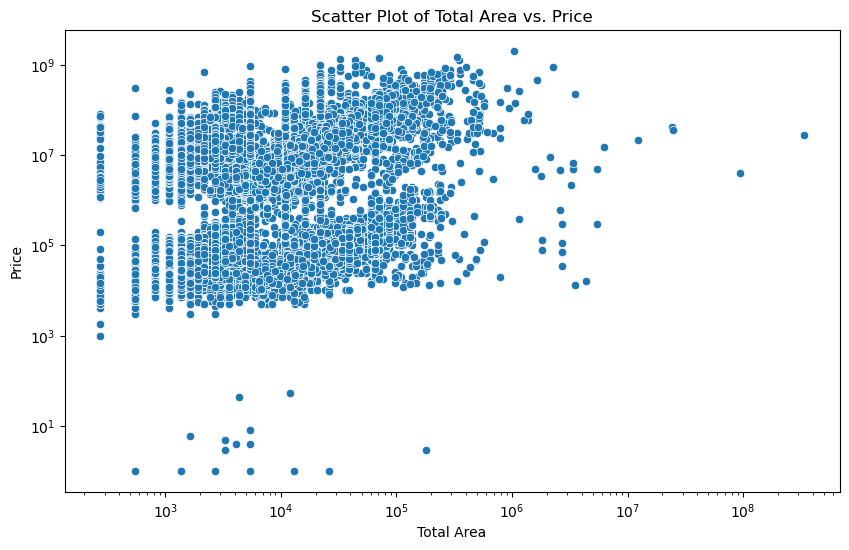

In [18]:
# Scatter plot of total_area vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df0['total_area'], y=df0['price'])
plt.title('Scatter Plot of Total Area vs. Price')
plt.xlabel('Total Area')
plt.ylabel('Price')
plt.xscale('log')  # Use logarithmic scale if the range of total_area is large
plt.yscale('log')  # Use logarithmic scale if the range of price is large
plt.show()

In [19]:
# Check for duplicates
df0.duplicated().sum()

0

In [20]:
from scipy import stats

# IQR Method
Q1_total_area = df0['total_area'].quantile(0.25)
Q3_total_area = df0['total_area'].quantile(0.75)
IQR_total_area = Q3_total_area - Q1_total_area
outliers_iqr = df0[(df0['total_area'] < (Q1_total_area - 1.5 * IQR_total_area)) | (df0['total_area'] > (Q3_total_area + 1.5 * IQR_total_area))]

print(f"Number of outliers: {len(outliers_iqr)}")


Number of outliers: 13179


In [21]:
df0 = df0[~df0.index.isin(outliers_iqr.index)]


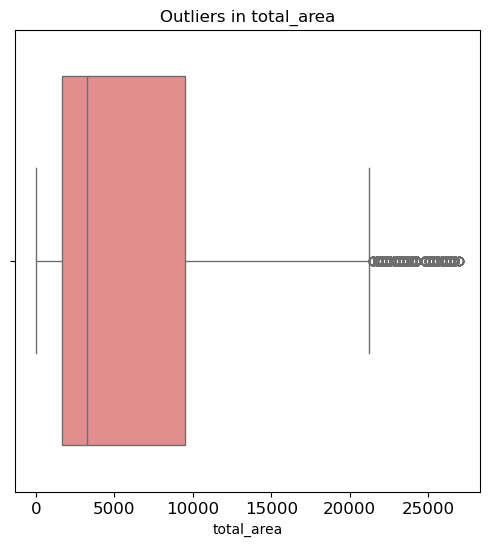

In [22]:
# check for outliers in total_area
plt.figure(figsize = (6,6))
sns.boxplot(x=df0['total_area'], color='lightcoral')
plt.title('Outliers in total_area')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [23]:
# Unique values for 'baths' and 'bedrooms'
unique_baths = df0['baths'].unique()
unique_bedrooms = df0['bedrooms'].unique()

print("Unique values for 'baths':", unique_baths)
print("Unique values for 'bedrooms':", unique_bedrooms)


Unique values for 'baths': [  2   3   6   4   8   7   5   1   0   9  10  11  13  12 403  14]
Unique values for 'bedrooms': [ 2  3  5  4  8  7  1  6  0 10  9 11 14 15 12 16 13 28 25 27]


In [24]:
# IQR Method for 'baths'
Q1_baths = df0['baths'].quantile(0.25)
Q3_baths = df0['baths'].quantile(0.75)
IQR_baths = Q3_baths - Q1_baths

outliers_baths = df0[(df0['baths'] < (Q1_baths - 1.5 * IQR_baths)) | (df0['baths'] > (Q3_baths + 1.5 * IQR_baths))]

print(Q1_baths,Q3_baths)
print(f"Number of outliers in 'baths': {len(outliers_baths)}")
df0 = df0[~df0.index.isin(outliers_baths.index)]


1.0 4.0
Number of outliers in 'baths': 1067


In [25]:
# IQR Method for 'bedrooms'
Q1_bedrooms = df0['bedrooms'].quantile(0.25)
Q3_bedrooms = df0['bedrooms'].quantile(0.75)
IQR_bedrooms = Q3_bedrooms - Q1_bedrooms

outliers_bedrooms = df0[(df0['bedrooms'] < (Q1_bedrooms - 1.5 * IQR_bedrooms)) | (df0['bedrooms'] > (Q3_bedrooms + 1.5 * IQR_bedrooms))]

print(Q1_bedrooms,Q3_bedrooms)
print(f"Number of outliers in 'bedrooms': {len(outliers_bedrooms)}")
df0 = df0[~df0.index.isin(outliers_bedrooms.index)]


2.0 4.0
Number of outliers in 'bedrooms': 1627


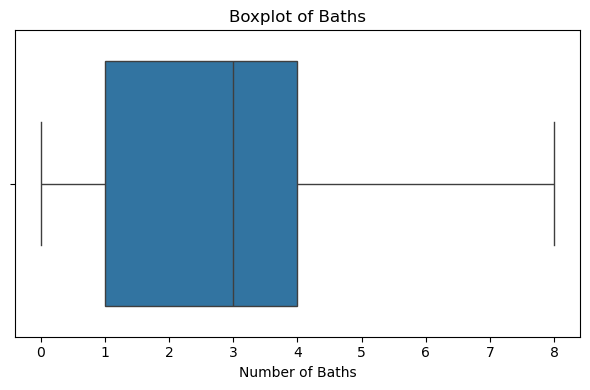

In [26]:
# Set up the matplotlib figure
plt.figure(figsize=(6, 4))

# Boxplot for 'baths'
sns.boxplot(x=df0['baths'])
plt.title('Boxplot of Baths')
plt.xlabel('Number of Baths')
# Show the plot
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Number of Bedrooms')

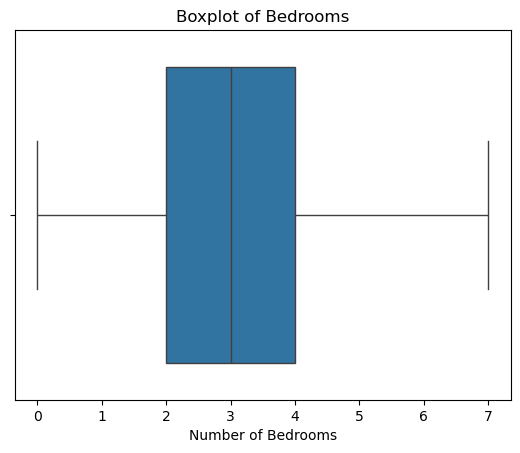

In [27]:
sns.boxplot(x=df0['bedrooms'])
plt.title('Boxplot of Bedrooms')
plt.xlabel('Number of Bedrooms')



In [28]:
# IQR Method for 'price'
Q1_price = df0['price'].quantile(0.25)
Q3_price = df0['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

outliers_price = df0[(df0['price'] < (Q1_price - 1.5 * IQR_price)) | (df0['price'] > (Q3_price + 1.5 * IQR_price))]

print(Q1_price, Q3_price)
print(f"Number of outliers in 'price': {len(outliers_price)}")
print(outliers_price[['price', 'total_area', 'property_type']].head(10))
df0 = df0[~df0.index.isin(outliers_price.index)]



175000.0 17500000.0
Number of outliers in 'price': 11506
       price  total_area property_type
3   43500000   10890.000         House
8   50000000    5445.000         House
11  48000000   21235.578          Flat
17  80000000   10890.000         House
20  55000000    3811.514         House
23  47000000   22869.084          Flat
52  52000000    5445.000         House
63  50000000    4900.518         House
67  45000000    5445.000         House
78  57500000    5445.000         House


Text(0.5, 0, 'Price')

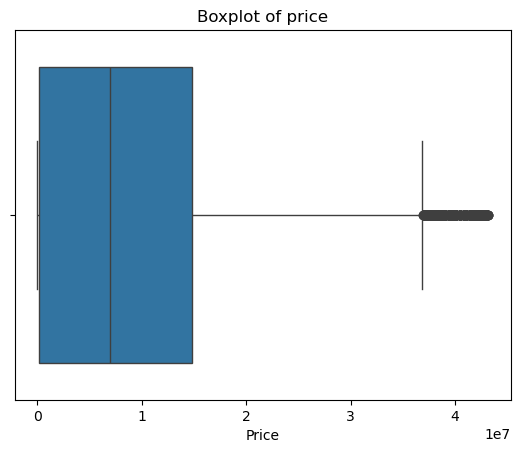

In [29]:
sns.boxplot(x=df0['price'])
plt.title('Boxplot of price')
plt.xlabel('Price')



In [30]:
# Impute outliers with median
#median_total_area = df0['total_area'].median()
#df0['total_area'] = df0['total_area'].apply(lambda x: median_total_area if x < (Q1_total_area - 1.5 * IQR_total_area) or x > (Q3_total_area + 1.5 * IQR_total_area) else x)

#median_baths = df0['baths'].median()

#df0['baths'] = df0['baths'].apply(lambda x: median_baths if x < (Q1_baths - 1.5 * IQR_baths) or x > (Q3_baths + 1.5 * IQR_baths) else x)

#median_bedrooms = df0['bedrooms'].median()
#df0['bedrooms'] = df0['bedrooms'].apply(lambda x: median_bedrooms if x < (Q1_bedrooms - 1.5 * IQR_bedrooms) or x > (Q3_bedrooms + 1.5 * IQR_bedrooms) else x)


In [31]:
df0['agent'].value_counts()

agent
Boez Ayub                                                                      39285
Azam Ali                                                                         638
Kashif                                                                           389
Muhammad Waqas Ansari                                                            351
Daud Ahmad(Co-CEO), Shafique Arshad Waince(Co-CEO), Zafar Iqbal Bajwa (CEO)      351
                                                                               ...  
Sh M Rizwan                                                                        1
Baber                                                                              1
M Hamza Naveed Shafqat Awan                                                        1
Waqar Ali, Zohaib Siddiqui                                                         1
Basit Aziz                                                                         1
Name: count, Length: 9674, dtype: int64

In [32]:
agency_counts = df0['agency'].value_counts()
agency_counts

agency
Real Investment Consultants     39289
Mash Allah Estate & Builders      662
Makkah Associates                 401
Arham Estate                      383
WAG Estate & Construction         351
                                ...  
Al Imran Marketing                  1
Agency 179630                       1
Gohar Property Consultants          1
Jubilee Real Estate                 1
Al Barka Property Consultant        1
Name: count, Length: 5510, dtype: int64

In [33]:
# Define a threshold for rare categories
threshold = 10  # For example, less frequent than 10 occurrences

# Identify rare categories
rare_agencies = agency_counts[agency_counts < threshold].index

# Replace rare categories with 'Other'
df0['agency'] = df0['agency'].replace(rare_agencies, 'Other')


In [34]:
# Display the top 10 agencies
top_agencies = agency_counts.head(10)
print(top_agencies)


agency
Real Investment Consultants     39289
Mash Allah Estate & Builders      662
Makkah Associates                 401
Arham Estate                      383
WAG Estate & Construction         351
Al Qasim Estate Agency            351
Chaudhry Estate                   326
Al Noor Estate Agency             300
Muzammil Associates               289
ZPN Real Estate & Builders        289
Name: count, dtype: int64


In [35]:
df0['agency'].unique()

array(['Real Investment Consultants', 'Easy Property',
       'Ettemad Enterprises', ..., 'Nabi Estate', 'Taqwa Associates',
       '99 The Real Estate'], dtype=object)

In [36]:
df0['location'].value_counts()

location
DHA Defence                                        13912
Bahria Town Karachi                                 8369
Bahria Town Rawalpindi                              7996
Bahria Town                                         5951
Gulistan-e-Jauhar                                   5405
                                                   ...  
Nooriabad                                              1
Federal Government Employees Housing Foundation        1
Firdous Colony                                         1
Gulfishan Town                                         1
Sundar                                                 1
Name: count, Length: 1467, dtype: int64

In [37]:
# Define a threshold for rare locations
threshold = 10  # For example, less frequent than 10 occurrences

# Calculate the frequency of each location
location_counts = df0['location'].value_counts()

# Identify rare locations
rare_locations = location_counts[location_counts < threshold].index

# Replace rare locations with 'Other'
df0['location'] = df0['location'].replace(rare_locations, 'Other')

# Display the updated counts
df0['location'].value_counts()



location
DHA Defence                     13912
Bahria Town Karachi              8369
Bahria Town Rawalpindi           7996
Bahria Town                      5951
Gulistan-e-Jauhar                5405
                                ...  
Numaish Chowrangi                  10
Shera Kot                          10
Green Park                         10
Bostan Road                        10
Nishtar Road (Lawrence Road)       10
Name: count, Length: 684, dtype: int64

In [38]:
df0.shape

(141067, 17)

In [39]:
df0.groupby('property_type')['property_type'].agg('count')

property_type
Farm House         213
Flat             34976
House            84305
Lower Portion     8233
Penthouse          268
Room               656
Upper Portion    12416
Name: property_type, dtype: int64

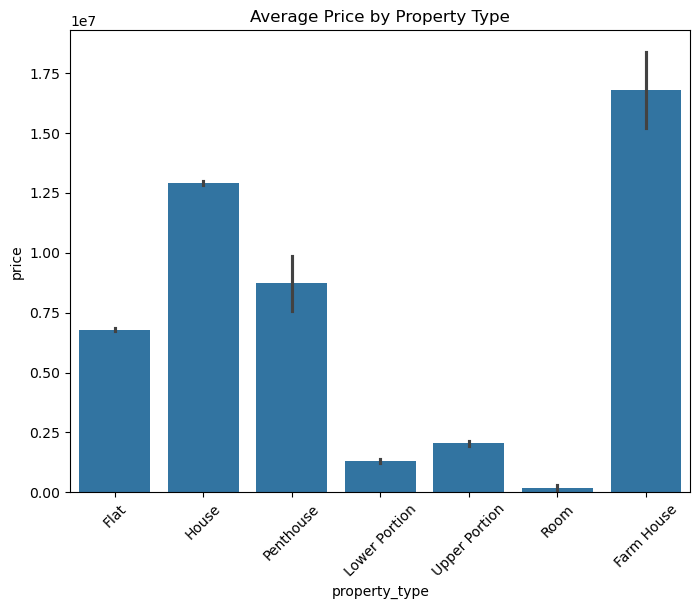

In [40]:
# Bar plot showing the average price for each property type
plt.figure(figsize=(8, 6))
sns.barplot(x='property_type', y='price', data=df0, estimator=lambda x: sum(x) / len(x))
plt.xticks(rotation=45)
plt.title('Average Price by Property Type')
plt.show()

In [41]:
df0['date_added'] = pd.to_datetime(df0['date_added'])

df0['year_added'] = df0['date_added'].dt.year


In [42]:
df0['year_added'].unique()

array([2019, 2018])

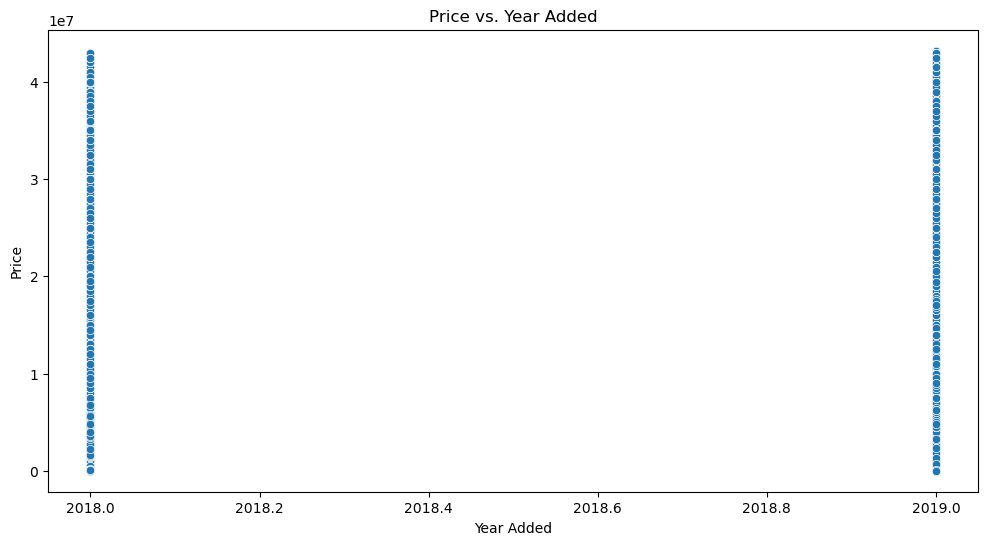

In [43]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='year_added', y='price', data=df0)
plt.title('Price vs. Year Added')
plt.xlabel('Year Added')
plt.ylabel('Price')
plt.show()

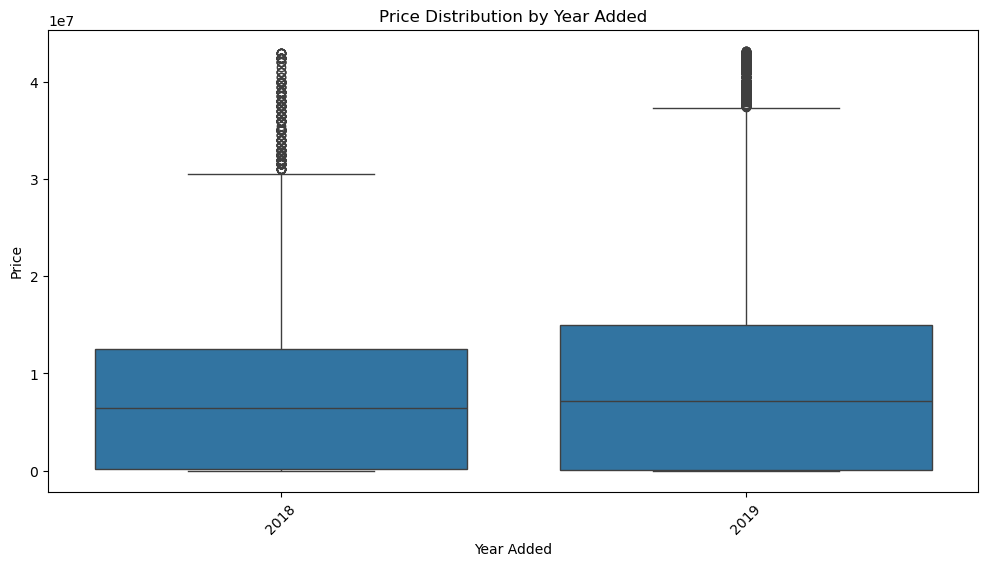

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='year_added', y='price', data=df0)
plt.title('Price Distribution by Year Added')
plt.xlabel('Year Added')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


In [45]:
# Summary statistics for each year
df0.groupby('year_added')['price'].describe()


,count,mean,std,min,25%,50%,75%,max
year_added,,,,,,,,
2018,10702.0,8.600883e+06,8.863457e+06,1.0,200000.0,6500000.0,12500000.0,43000000.0
2019,130365.0,9.791103e+06,1.018651e+07,0.0,109000.0,7200000.0,15000000.0,43200000.0


In [46]:
df0['year_added'] = pd.to_numeric(df0['year_added'], errors='coerce')

# Calculate correlation
correlation = df0[['year_added', 'price']].corr().iloc[0, 1]
print(f"Correlation between 'year_added' and 'price': {correlation:.2f}")

Correlation between 'year_added' and 'price': 0.03


In [47]:
df0.columns

Index(['Unnamed: 0', 'property_id', 'location_id', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'purpose', 'bedrooms', 'date_added', 'agency', 'agent', 'total_area',
       'year_added'],
      dtype='object')

In [48]:
columns_to_drop = ['Unnamed: 0', 'property_id', 'location_id', 
         'latitude', 'longitude',
        'date_added',  'agent']
df0 = df0.drop(columns=columns_to_drop)


In [49]:
df0 = df0.drop(['year_added'] ,axis =1)

In [50]:
df0.columns

Index(['property_type', 'price', 'location', 'city', 'province_name', 'baths',
       'purpose', 'bedrooms', 'agency', 'total_area'],
      dtype='object')

In [51]:
# Encode categorical features 
df_encoded = pd.get_dummies(df0, 
                            columns=['property_type', 'location', 'city', 'province_name', 'purpose', 'agency'], 
                            drop_first=True)

# Convert all columns to integer type
df_encoded = df_encoded.astype(int)

print(df_encoded.head())

      price  baths  bedrooms  total_area  property_type_Flat  \
0  10000000      2         2        1089                   1   
1   6900000      3         3       15246                   1   
2  16500000      6         5        2178                   0   
4   7000000      3         3        2178                   0   
7   7800000      2         2       16879                   1   

   property_type_House  property_type_Lower Portion  property_type_Penthouse  \
0                    0                            0                        0   
1                    0                            0                        0   
2                    1                            0                        0   
4                    1                            0                        0   
7                    0                            0                        0   

   property_type_Room  property_type_Upper Portion  ...  \
0                   0                            0  ...   
1               

In [53]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Select numerical columns
numerical_columns = ['total_area', 'baths', 'bedrooms']  

# Fit and transform the numerical data
df0[numerical_columns] = scaler.fit_transform(df0[numerical_columns])

# Check the scaled data
print(df0.head())

      price     baths  bedrooms  total_area  property_type_Flat  \
0  10000000 -0.301686 -0.520901   -0.807666                   1   
1   6900000  0.195121  0.075785    1.444105                   1   
2  16500000  1.685542  1.269158   -0.634453                   0   
4   7000000  0.195121  0.075785   -0.634453                   0   
7   7800000 -0.301686 -0.520901    1.703845                   1   

   property_type_House  property_type_Lower Portion  property_type_Penthouse  \
0                    0                            0                        0   
1                    0                            0                        0   
2                    1                            0                        0   
4                    1                            0                        0   
7                    0                            0                        0   

   property_type_Room  property_type_Upper Portion  ...  \
0                   0                            0  ...  

In [54]:
# Separate features and target
X = df0.drop('price', axis=1)
y = df0['price']


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
%%time
# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)


CPU times: total: 6min 12s
Wall time: 1min 32s


LinearRegression()

In [57]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 31230762000451.21
R^2 Score: 0.6909450639541952


In [59]:
model.score(X_test, y_test)

0.6909450639541952